## Final Project GEOL 787
## Connor Smith

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.modeling.models import Gaussian2D
from IPython.display import display, clear_output #To generate movie 
from IPython.display import Image #To display image
%matplotlib inline

## Abstract
The purpose of this jupyter noteboook is to produce synthetic data of a simpliefed geothermal exploration model and establish a method to represent data as positive and negative training examples fit to train and test a CNN predictive model. Synthetic training data that is randomized or simulates the causative bodies of geophysical and geologic features might either collocate for a geothermal target and/or represent negative potential. The synthetic training data code is designed to generate 3 channels that simulate mapping/exploration elements of a geothermal exploration model where an overlapping high (channel 1) is plotted as a smoothly decaying ellipsoid, a halo type structure (channel 2) is plotted as a smoothly decaying ring, and a coincident geologic structure (channel 3) is plotted as a discrete polygon. 
    

![title](GTCollocation.png) 
        
(From Craig, 2018, Collocated intersecting (A) gravity gradients, (B) magnetic-low, (C) low-resistivity, 2-m temperature anomaly,and (D) favorable oriented faults for slip and dilation)

### Motivation/Intro
The motivation for this method comes from Granek, 2016, synthetic data set of a porphyry intrusion to train a CNN. 
    
![title](TDex.png) 

      (From Granek, 2016, synthetic modeling of a porphyry intrusion)
      
multi-modal synthetic data that is designed to represent the simplified geothermal exploration problem of identifying collocated structures.
 

### Methods

Generating contour plot channels

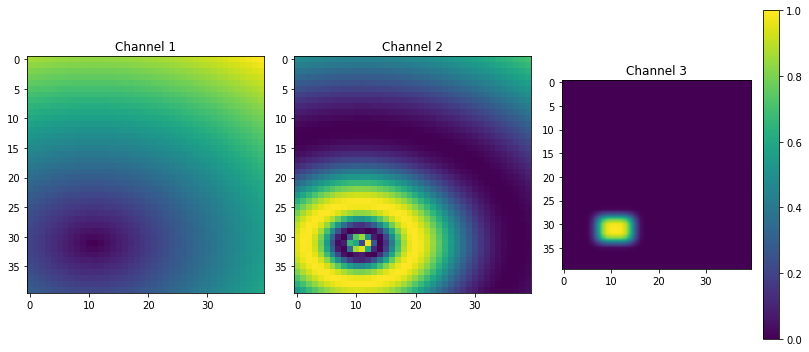

In [278]:
#This block of code creates three subplots of the example of the three channels, using the Ipython display they are
#each plotted N # of times with random (yet constrained) origins and dimensions

# Option to fix random state for reproducibility
#np.random.seed(3) # test if the same # combinations occur 
gauss = Gaussian2D(1, 0, 0, 3, 3)

N= 15 # the number of iterations 

x_start, x_end = -20,20  #-2.0, 2.0
y_start, y_end = -20,20  #-1.0, 1.0
X = np.linspace(x_start, x_end, 40)
Y = np.linspace(y_start, y_end, 40)
x, y = np.meshgrid(X, Y) # Meshgrid to evaluate functions on


u=np.random.uniform(x_start,x_end,N)# changes x-position of the center
v=np.random.uniform(y_start,y_end,N) # changes y-position of the center

a=np.random.uniform(0.1,0.5,N) #changes dimensions on the x-axis
b=np.random.uniform(0.1,0.5,N) #changes dimensions  on the y-axis 
c=np.random.uniform(0.55,1.75,N) #changes dimensions on the x-axis
d=np.random.uniform(0.55,1.75,N) #changes dimensions  on the y-axis
e=np.random.uniform(2.55,3.75,N)

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
#iterate over loop to generate sub plot movies
for i in range(0,N,1):
    plt.cla()
    plt.subplot(141)
    #plt.imshow()
    plt.imshow(np.sqrt((a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2)))#,interpolation='bilinear') #magnitude x^2+y^2
    plt.title('Channel 1')

    plt.subplot(142) #x = u+a.cos(t) ; y = v+b.sin(t)
    #plt.imshow(np.sin(np.sqrt(y-v[i])**2+(x-u[i])**2)/2) #np.sqrt(x**2+y**2))
    #plt.imshow(gauss(np.cos((x-u[i])),np.sin((y-v[i]))))
    plt.imshow((-np.sin(1.5*np.log(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))))#,interpolation='quadric') 
    plt.title('Channel 2')
    
    plt.subplot(143) #instead of a or b to randomize dimensions, c or d (more discrete). 
    np.sin
    plt.imshow(gauss(a[i]*(x-u[i])**2, b[i]*(y-v[i])**2),interpolation='bilinear')
    #plt.imshow((gauss(c[i]*(x-u[i]), d[i]*(y-v[i]))))# ,interpolation='bilinear') # * (np.random.rand(20, 20) - 0)))
    #plt.imshow(np.abs(np.cos((x-u[i])**2 + (y-v[i])**2) / ((x-u[i])**2 + (y-v[i])**2)),interpolation='bilinear')
    plt.title('Channel 3')
    plt.gca().set_aspect('equal')
    
    display(fig) 
    clear_output(wait=True)
plt.clim(0, 1) #This is a manual setting, actual magnitude can be adjusted in equations      
plt.colorbar()
plt.tight_layout()


Plotted above: overlapping high (channel 1) is plotted as a smoothly decaying ellipsoid, a halo type structure (channel 2) is plotted as a smoothly decaying ring, and a coincident geologic structure (channel 3) is plotted as a discrete polygon.


Channel 1 is plotted as the magnitude of x and y

Channel 2 is plotted as a negative sin function of log (x^2 + y^2) 

Channel 3's plotted as a normalized gaussian kernel of x^2 + y^2

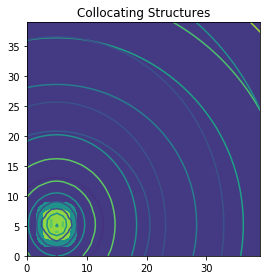

In [276]:
N=10
fig, ax = plt.subplots()
for i in range(0,N,1):
    plt.cla()
    c1=ax.contour((np.hypot(x-u[i], y-v[i])),interpolation='bilinear') #np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2),2) #,interpolation='bilinear')

    #c2=ax.contour(-np.sin(2*np.log(np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))),2,interpolation='quadric')
    c2=ax.contour((-np.sin(1.5*np.log(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))),2,interpolation='quadric')
    c3=ax.contourf(gauss(a[i]*(x-u[i])**2, b[i]*(y-v[i])**2),2,interpolation='bilinear')# 
    #c3=ax.contour(np.abs(np.cos((x-u[i])**2 + (y-v[i])**2) / ((x-u[i])**2 + (y-v[i])**2)),2,interpolation='bilinear')
   
    plt.gca().set_aspect('equal')
    plt.title('Collocating Structures')
    display(fig) 
    clear_output(wait=True)

plt.tight_layout()

Randomizing data, generating labels, exporting to PNG

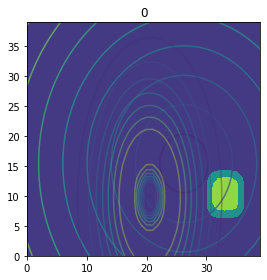

In [277]:
N=140

u=np.random.uniform(x_start,x_end,N)#x-position of the center
v=np.random.uniform(x_start,x_end,N) #y-position of the center

m=np.random.uniform(x_start,x_end,N) #new random element
n=np.random.uniform(y_start,y_end,N) #new random element
q=np.random.uniform(x_start,x_end,N) #new random element
p=np.random.uniform(y_start,y_end,N) #new random element

a=np.random.uniform(0.1,0.5,N) #dimensions on the x-axis
b=np.random.uniform(0.1,0.5,N) #dimensions on the y-axis 
c=np.random.uniform(0.05,0.5,N) #dimensions on the x-axis/smaller to make ring bigger
d=np.random.uniform(0.05,0.5,N) #dimensions on the y-axis/smaller to make ring bigger 
e=np.random.uniform(0.1,0.5,N) #dimensions on the x-axis
f=np.random.uniform(0.1,0.5,N) #dimensions on the y-axis


fig, ax = plt.subplots()
for i in range(0,N,1):
    plt.cla()
    #z1=np.hypot(x-u[i], y-v[i])
    z1=np.sqrt((a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))
    c1=ax.contour(z1,alpha=0.7)
    
    z2=np.sin(2*np.log(np.sqrt(c[i]*(x-m[i])**2 + d[i]*(y-n[i])**2)))
    c2=ax.contour(z2,alpha=0.4)
    
    z3= gauss(e[i]*(x-p[i])**2, f[i]*(y-q[i])**2)
    #np.abs(np.cos(2*np.pi*(x-p[i])**2 + (y-q[i])**2) / ((x-p[i])**2 + (y-q[i])**2))
    c3=ax.contourf(z3,2,)
    
    plt.gca().set_aspect('equal')
    display(fig) 
    clear_output(wait=True)
    if np.sum(np.hypot(u[i]-m[i], v[i]-n[i]))< 15 and np.sum(np.hypot(m[i]-p[i], n[i]-q[i]))< 10:
        plt.title(1)
        #fig.savefig('Pos_Training_Data/ExPlot' + str(i)+ '.png') # This saves a png for each value from 0 to N
    else:
        plt.title(0)
        #fig.savefig('Neg_Training_Data/ExPlot' + str(i)+ '.png') # This saves a png for each value from 0 to N

#plt.colorbar()
plt.tight_layout()

### Challenges

-refining the functions that set up contours
-establishing a conditional statement to determine labels on the plots.
-accounting for false positive and false negative results

## References 

Craig, J.W., 2018, Discovery and analysis of a blind geothermal system in southeastern Gabbs Valley, western Nevada [M.S.Thesis]: University of Nevada, Reno, p. 1-111
    
Granek, J., 2016, Application of machine learning algorithms to mineral prospectivity mapping [Ph.D. Thesis]:. University of British Columbia, p.xxxx, doi: https://open.library.ubc.ca/collections/ubctheses/24/items/1.0340340    